# Analyse Weather Forecasts

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data'

In [3]:
sorted([name for name in os.listdir(data_dir) if name.endswith('.csv')])

['temp_fcast_BC_0000141_2023-06-24.csv',
 'temp_fcast_BC_0000141_2023-06-25.csv',
 'temp_fcast_BC_0000141_2023-06-26.csv',
 'temp_fcast_BC_0000141_2023-06-27.csv',
 'temp_fcast_BC_0000141_2023-06-28.csv',
 'temp_fcast_BC_0000141_2023-06-29.csv',
 'temp_fcast_BC_0000141_2023-06-30.csv',
 'temp_fcast_BC_0000141_2023-07-01.csv',
 'temp_fcast_BC_0000141_2023-07-02.csv',
 'temp_fcast_BC_0000141_2023-07-03.csv',
 'temp_fcast_BC_0000141_2023-07-04.csv',
 'temp_fcast_BC_0000141_2023-07-05.csv',
 'temp_fcast_BC_0000141_2023-07-06.csv',
 'temp_fcast_BC_0000141_2023-07-07.csv',
 'temp_fcast_BC_0000141_2023-07-08.csv',
 'temp_fcast_BC_0000141_2023-07-09.csv',
 'temp_fcast_BC_0000141_2023-07-10.csv',
 'temp_fcast_BC_0000141_2023-07-11.csv',
 'temp_fcast_BC_0000141_2023-07-12.csv',
 'temp_fcast_BC_0000141_2023-07-13.csv',
 'temp_fcast_BC_0000141_2023-07-14.csv',
 'temp_fcast_BC_0000141_2023-07-15.csv',
 'temp_fcast_BC_0000141_2023-07-16.csv',
 'temp_fcast_BC_0000141_2023-07-17.csv',
 'temp_fcast_BC_

In [4]:
loc_key = 'temp_fcast_BC_0000141'
date = '2023-10-27'
filename = f'{loc_key}_{date}.csv'
filename

'temp_fcast_BC_0000141_2023-10-27.csv'

In [5]:
df = pd.read_csv(os.path.join(data_dir, filename))
df.head()

,Date,Hour,Time,Current actual,Start hour,End hour,F00,F01,F02,F03,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23
0,2023-10-27,0,00:05,2.1,1,0,3.0,3.0,3.0,2.0,...,8.0,8.0,8.0,7.0,5.0,4.0,4.0,3.0,3.0,3.0
1,2023-10-27,1,01:05,2.3,2,1,3.0,3.0,2.0,2.0,...,8.0,8.0,7.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0
2,2023-10-27,2,02:05,0.5,3,2,3.0,2.0,2.0,1.0,...,8.0,7.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
3,2023-10-27,3,03:05,1.1,4,3,2.0,2.0,1.0,1.0,...,7.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
4,2023-10-27,4,04:05,1.0,5,4,2.0,1.0,1.0,0.0,...,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0


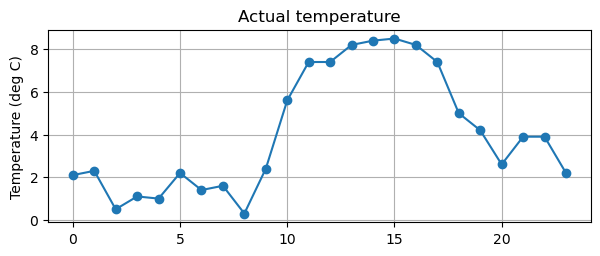

In [6]:
actual_temp = df['Current actual'].rename('Actual temperature')
actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel(f'Temperature (deg C)')
plt.title(actual_temp.name)
plt.show()

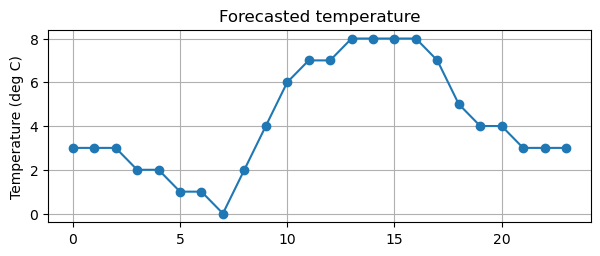

In [7]:
hours = np.arange(0, 24)
fcast_temp = df.loc[df.Hour == 0, [f'F{h:02d}' for h in hours]].loc[0].rename('Forecasted temperature')
fcast_temp.index = hours
fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel(f'Temperature (deg C)')
plt.title(fcast_temp.name)
plt.show()

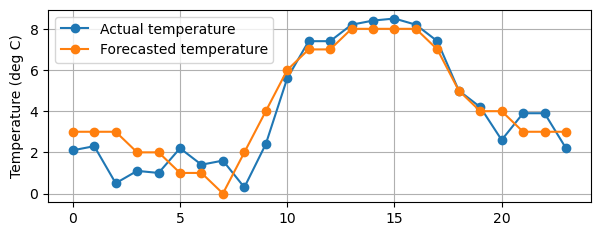

In [8]:
actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
plt.ylabel(f'Temperature (deg C)')
plt.legend()
plt.show()

In [9]:
rms_error = np.sqrt(np.mean((actual_temp - fcast_temp) ** 2))
rms_error

1.0074720839804943

## Calculate all forecasts and actuals

In [10]:
actual_temps = []
fcast_temps = []
index = pd.date_range('2023-06-26', '2023-10-28', name='Date')
for date in index:
    date_str = date.strftime('%Y-%m-%d')
    filename = f'{loc_key}_{date_str}.csv'
    df = pd.read_csv(os.path.join(data_dir, filename))
    fcast_temp = df.loc[df.Hour == 0, [f'F{h:02d}' for h in hours]]
    try:
        fcast_temp = fcast_temp.loc[0].rename('Forecasted temperature')
    except KeyError:
        fcast_temp = pd.Series(np.full((24, ), np.nan))
    fcast_temp.index = hours
    actual_temp = df['Current actual'].rename('Actual temperature')
    rms_error = np.sqrt(np.mean((actual_temp - fcast_temp) ** 2))
    #print(f"{date_str}: {rms_error:.2f}")
    actual_temps.append(actual_temp)
    fcast_temps.append(fcast_temp)
hours_index = pd.Index(hours, name='Hour')
fcast_temps = pd.DataFrame(fcast_temps, index=index, columns=hours_index)
actual_temps = pd.DataFrame(actual_temps, index=index, columns=hours_index)

In [11]:
actual_temps.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,15.5,14.8,14.3,13.2,12.8,12.4,12.4,14.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27,15.4,14.8,14.4,13.8,13.4,12.7,13.2,14.2,15.9,16.6,...,18.6,18.6,20.7,22.4,21.5,21.6,20.6,19.1,18.1,17.4
2023-06-28,16.5,16.2,15.7,15.5,14.9,13.9,14.5,15.6,17.2,18.5,...,21.1,21.1,22.4,22.4,24.7,24.0,21.7,20.1,17.8,16.7
2023-06-29,16.1,16.0,15.3,15.4,15.0,14.3,14.8,15.6,17.0,17.0,...,23.6,22.7,22.5,22.4,22.8,22.7,22.7,18.5,17.0,17.7
2023-06-30,16.5,16.5,15.4,14.5,13.8,13.7,13.7,15.8,17.0,18.7,...,20.5,20.5,21.0,21.3,21.7,21.7,21.7,20.4,17.5,16.3


In [12]:
fcast_temps.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,15.0,14.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,18.0,...,21.0,21.0,21.0,21.0,21.0,20.0,19.0,19.0,18.0,17.0
2023-06-27,17.0,16.0,15.0,14.0,13.0,14.0,16.0,17.0,18.0,18.0,...,21.0,22.0,22.0,21.0,21.0,20.0,19.0,19.0,18.0,17.0
2023-06-28,17.0,16.0,15.0,15.0,14.0,15.0,16.0,17.0,17.0,18.0,...,21.0,22.0,22.0,21.0,21.0,20.0,19.0,19.0,18.0,17.0
2023-06-29,17.0,16.0,16.0,15.0,15.0,16.0,16.0,17.0,18.0,18.0,...,22.0,22.0,23.0,22.0,21.0,20.0,19.0,19.0,18.0,17.0
2023-06-30,17.0,16.0,16.0,15.0,15.0,16.0,16.0,17.0,18.0,18.0,...,22.0,23.0,23.0,22.0,22.0,21.0,20.0,19.0,18.0,17.0


In [13]:
rms_errors = ((actual_temps - fcast_temps) ** 2).mean(axis=1).pow(0.5).rename('RMSE')
rms_errors.head()

Date
2023-06-26    1.287925
2023-06-27    1.629417
2023-06-28    1.513137
2023-06-29    1.472526
2023-06-30    1.265570
Freq: D, Name: RMSE, dtype: float64

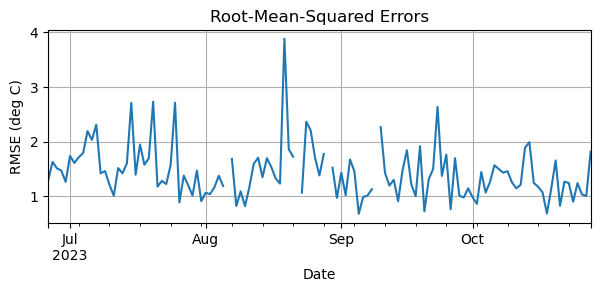

In [15]:
rms_errors.plot(figsize=(7, 2.5), grid=True)
plt.ylabel(f'{rms_errors.name} (deg C)')
plt.title('Root-Mean-Squared Errors')
plt.show()

## Plot 5 worst forecasts

In [16]:
worst_5 = rms_errors.sort_values(ascending=False).head()
worst_5

Date
2023-08-19    3.874651
2023-07-20    2.726185
2023-07-25    2.708474
2023-07-15    2.705858
2023-09-23    2.631746
Name: RMSE, dtype: float64

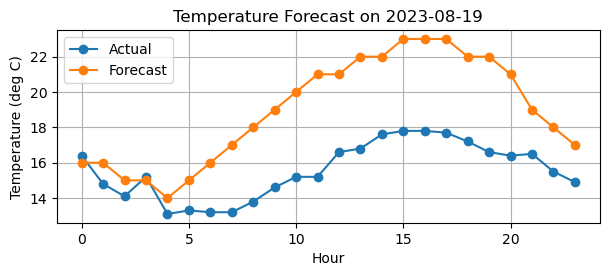

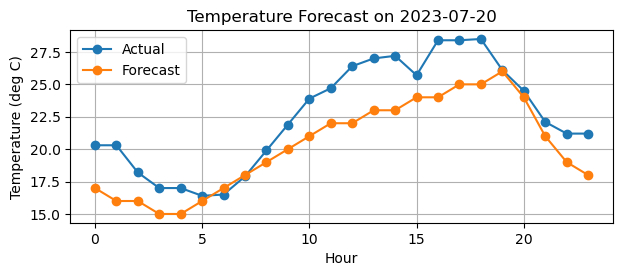

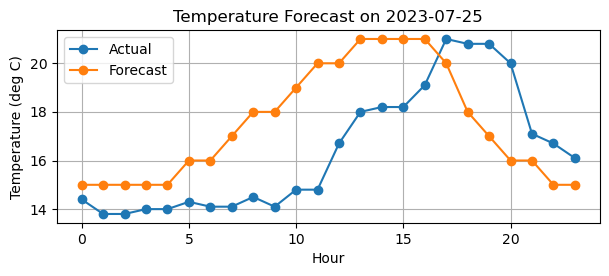

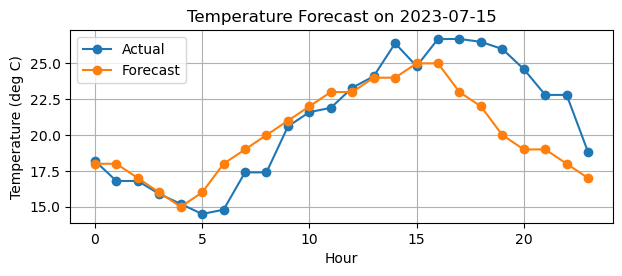

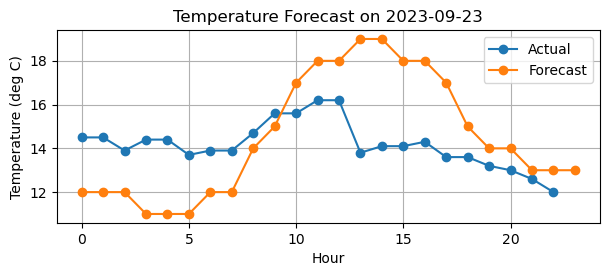

In [17]:
for date in worst_5.index:
    
    actual_temp = actual_temps.loc[date].rename('Actual')
    fcast_temp = fcast_temps.loc[date].rename('Forecast')
    
    actual_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    fcast_temp.plot(grid=True, style='o-', figsize=(7, 2.5))
    plt.ylabel(f'Temperature (deg C)')
    plt.title(f'Temperature Forecast on {date.date()}')
    plt.legend()
    plt.show()

## Calculate mean forecast errors by hour of day

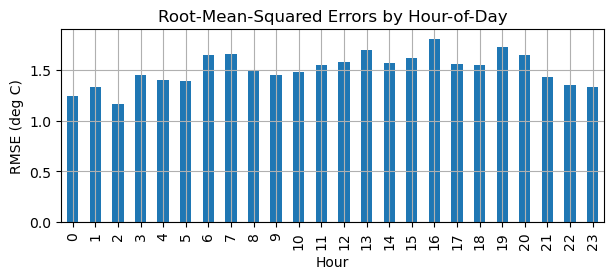

In [19]:
rms_error_by_hour = ((actual_temps - fcast_temps) ** 2).mean(axis=0).pow(0.5).rename('RMSE')
rms_error_by_hour.plot.bar(figsize=(7, 2.5), grid=True)
plt.ylabel(f'{rms_error_by_hour.name} (deg C)')
plt.title('Root-Mean-Squared Errors by Hour-of-Day')
plt.show()